In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


In [2]:
!nvidia-smi

Fri Apr 28 17:19:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    44W / 350W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Data analysis

In [3]:
%pwd

'/content'

In [4]:
%cd /content/drive/MyDrive/Colab/pydomains

/content/drive/MyDrive/Colab/pydomains


In [5]:
df = pd.read_csv('yougov_data/final_domains.csv.gz')

In [6]:
df.head()

,text,domain,cat_name
0,try function true atmosphere rah deluxe return...,business-tour,recreation
1,wonderful lot picture following kept ended tak...,blownalky.netfirms,recreation
2,please guarantee price sale function return ro...,sandalwoodhotel,recreation
3,switch case function return time like os else ...,phuket-stay,recreation
4,cape price bedroom climate plan sea kilometer ...,capeescapes,recreation


In [7]:
df.groupby('cat_name').count()

,text,domain
cat_name,,
adv,3803,3816
aggressive,144,144
alcohol,489,500
anonvpn,52,52
automobile,2214,2234
chat,6115,6120
costtraps,110,110
dating,908,913
downloads,1544,1544


In [8]:
df.shape

(549491, 3)

In [9]:
df = df.fillna('')

In [10]:
df['cat_name'].unique()

array(['recreation', 'porn', 'news', 'hobby', 'radiotv', 'chat', 'adv',
       'shopping', 'religion', 'finance', 'downloads', 'education',
       'library', 'music', 'webmail', 'spyware', 'gamble', 'government',
       'webradio', 'science', 'webphone', 'models', 'hospitals', 'forum',
       'automobile', 'redirector', 'movies', 'drugs', 'sex',
       'imagehosting', 'military', 'jobsearch', 'socialnet',
       'urlshortener', 'dating', 'fortunetelling', 'warez', 'homestyle',
       'searchengines', 'alcohol', 'ringtones', 'aggressive', 'politics',
       'isp', 'tracker', 'dynamic', 'webtv', 'weapons', 'violence',
       'podcasts', 'hacking', 'costtraps', 'anonvpn', 'remotecontrol',
       'updatesites', 'health'], dtype=object)

In [11]:
len(df['cat_name'].unique())

56

In [12]:
df.groupby('cat_name').count()

,text,domain
cat_name,,
adv,3816,3816
aggressive,144,144
alcohol,500,500
anonvpn,52,52
automobile,2234,2234
chat,6120,6120
costtraps,110,110
dating,913,913
downloads,1544,1544


In [13]:
df['text'].value_counts()

functionality necessary enable full web                                                                                                                                                                                                                                                                                                                                                                                                     26501
please guarantee price sale function return robot view security back talk form money domain prove customer check care                                                                                                                                                                                                                                                                                                                       22490
found                                                                                                                               

In [14]:
df[df['text'] == "please guarantee price sale function return robot view security back talk form money domain prove customer check care"].groupby('cat_name').count()

,text,domain
cat_name,,
adv,287,287
aggressive,3,3
alcohol,4,4
anonvpn,1,1
automobile,33,33
chat,121,121
costtraps,2,2
dating,9,9
downloads,58,58


In [15]:
df.loc[df['text'].map(df['text'].value_counts()) > 1, 'text'] = ''

## Get only domains which have words greater than 5

In [16]:
df.count()

text        549491
domain      549491
cat_name    549491
dtype: int64

In [17]:
len_text = df['text'].str.split("\\s+")
df = df.drop(df[len_text.str.len() <= 5].index)

In [18]:
df.count()

text        290103
domain      290103
cat_name    290103
dtype: int64

In [19]:
df['category_codes'] = df.cat_name.astype('category').cat.codes

In [20]:
df.groupby('cat_name').count().index

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic', 'education',
       'finance', 'fortunetelling', 'forum', 'gamble', 'government', 'hacking',
       'health', 'hobby', 'homestyle', 'hospitals', 'imagehosting', 'isp',
       'jobsearch', 'library', 'military', 'models', 'movies', 'music', 'news',
       'podcasts', 'politics', 'porn', 'radiotv', 'recreation', 'redirector',
       'religion', 'remotecontrol', 'ringtones', 'science', 'searchengines',
       'sex', 'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [21]:
classes = df.groupby('cat_name').count().index

In [22]:
df.groupby('category_codes').count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55],
           dtype='int64', name='category_codes')

In [23]:
df.loc[df['category_codes'] == 43]

,text,domain,cat_name,category_codes
38,compatible cool western slowly reserved protec...,ninjaremote,shopping,43
43,switch case alphabetically function link stead...,stomp.com,shopping,43
48,das montage natural flip fall dinge fur den we...,profeline,shopping,43
50,das output da den sind es false live prevent t...,bofrost,shopping,43
51,earning rate copy time flat special famous wor...,fireantranch,shopping,43
...,...,...,...,...
547480,cosy searches styles longline collection smith...,yoursclothing,shopping,43
547481,styles spongebob cuphead cartdata collection b...,youtooz,shopping,43
547485,chewbacca barbie passed financial n discount c...,zavvi,shopping,43
547487,styles deployment reserved terms collection sm...,zippo,shopping,43


In [24]:
df.head()

,text,domain,cat_name,category_codes
0,try function true atmosphere rah deluxe return...,business-tour,recreation,35
1,wonderful lot picture following kept ended tak...,blownalky.netfirms,recreation,35
4,cape price bedroom climate plan sea kilometer ...,capeescapes,recreation,35
5,swaying bedroom dock waterfront perfect island...,sanibelsand,recreation,35
7,das bis digital den stark nach sailing charter...,ibn-online,recreation,35


## Reducing categories
Deleting chat, hacking and webtv cat, as we don't have respective image volume

In [25]:
df.groupby('cat_name').count()

,text,domain,category_codes
cat_name,,,
adv,824,824,824
aggressive,69,69,69
alcohol,387,387,387
anonvpn,31,31,31
automobile,1650,1650,1650
chat,3499,3499,3499
costtraps,30,30,30
dating,536,536,536
downloads,614,614,614


In [26]:
df = df[df['cat_name'] != 'chat']
df = df[df['cat_name'] != 'hacking']
df = df[df['cat_name'] != 'webtv']

In [27]:
categories_less_than_100 = df.groupby('cat_name').count()[df.groupby('cat_name').count()['text'] < 100].index

In [28]:
categories_less_than_100

Index(['aggressive', 'anonvpn', 'costtraps', 'dynamic', 'health', 'homestyle',
       'library', 'military', 'podcasts', 'remotecontrol', 'ringtones',
       'updatesites', 'violence', 'webphone'],
      dtype='object', name='cat_name')

In [29]:
df = df.drop(df[df['cat_name'].isin(categories_less_than_100)].index)

In [30]:
df['category_codes'] = df.cat_name.astype('category').cat.codes

In [31]:
df.groupby('category_codes').count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38],
           dtype='int64', name='category_codes')

In [32]:
df['domain'] + ' ' + df['text'] 

0         business-tour try function true atmosphere rah...
1         blownalky.netfirms wonderful lot picture follo...
4         capeescapes cape price bedroom climate plan se...
5         sanibelsand swaying bedroom dock waterfront pe...
7         ibn-online das bis digital den stark nach sail...
                                ...                        
549484    wbiw affiliate iscontenteditable string n file...
549485    wbtw plan n file terms story loris bites more ...
549486    wcvb affiliate plan massachusetts n file terms...
549488    wsiltv landingpopular mayfield marshmallow n p...
549489    wxxv25 affiliate financial file terms story mo...
Length: 285744, dtype: object

In [33]:
len_of_text = df['text'].str.split("\\s+")

In [34]:
len_of_text.str.len().max()

13191

In [35]:
df.loc[df['cat_name'] == 'news']

,text,domain,cat_name,category_codes
54,moonfall accordion offset back sonic unbearabl...,kinokadr,news,20
67,das tele link den tod star panorama nach sind ...,voyager-center,news,20
106,das login bis invasion ist may urban special p...,europa-vinyl,news,20
132,sports score taken well valley edition weekend...,gallupindependent,news,20
191,trip blessed picture string file powered colle...,jefflarsen,news,20
...,...,...,...,...
549484,affiliate iscontenteditable string n file sess...,wbiw,news,20
549485,plan n file terms story loris bites more andro...,wbtw,news,20
549486,affiliate plan massachusetts n file terms stor...,wcvb,news,20
549488,landingpopular mayfield marshmallow n publishe...,wsiltv,news,20


In [36]:
classes = df.groupby('cat_name').count().index

In [37]:
classes

Index(['adv', 'alcohol', 'automobile', 'dating', 'downloads', 'drugs',
       'education', 'finance', 'fortunetelling', 'forum', 'gamble',
       'government', 'hobby', 'hospitals', 'imagehosting', 'isp', 'jobsearch',
       'models', 'movies', 'music', 'news', 'politics', 'porn', 'radiotv',
       'recreation', 'redirector', 'religion', 'science', 'searchengines',
       'sex', 'shopping', 'socialnet', 'spyware', 'tracker', 'urlshortener',
       'warez', 'weapons', 'webmail', 'webradio'],
      dtype='object', name='cat_name')

# Split Data

In [ ]:
X = (df['domain'] + ' ' + df['text']).values
y = df['category_codes'].values

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.size

228595

In [ ]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38], dtype=int8),
 array([  668,   314,  1314,   417,   501,   496,  3915,  9949,   286,
         1610,  1614,   283,  8382,   671,   123,   210,  1153,   312,
         1196,  1850, 12620,   596, 46402,  1606, 79239,  1076,  3328,
          441,   150,   190, 44329,   178,  1233,   111,   143,   259,
          225,   334,   871]))

In [ ]:
X_rem.size

57149

In [ ]:
np.unique(y_rem, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38], dtype=int8),
 array([  156,    73,   336,   119,   113,   124,   968,  2536,    67,
          402,   396,    63,  2041,   168,    21,    47,   300,    67,
          312,   458,  3252,   170, 11645,   389, 19631,   262,   802,
          113,    51,    45, 11158,    39,   277,    30,    35,    62,
           63,    92,   266]))

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [ ]:
X_val.size

28574

In [ ]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38], dtype=int8),
 array([  77,   35,  177,   59,   58,   65,  505, 1243,   37,  191,  193,
          33, 1051,   78,    9,   21,  149,   32,  168,  227, 1684,   83,
        5918,  206, 9689,  119,  398,   55,   23,   20, 5552,   19,  137,
          10,   22,   28,   31,   47,  125]))

In [ ]:
X_test.size

28575

In [ ]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38], dtype=int8),
 array([  79,   38,  159,   60,   55,   59,  463, 1293,   30,  211,  203,
          30,  990,   90,   12,   26,  151,   35,  144,  231, 1568,   87,
        5727,  183, 9942,  143,  404,   58,   28,   25, 5606,   20,  140,
          20,   13,   34,   32,   45,  141]))

In [ ]:
X_train[10000]

'nexnix.co contrast preoccupation well ultra trading blower used surface rolled rugged tortious opacity lyrical universal polymer whatsoever also size shot shall void film found classic visitor auto transparent constructor setting theme creek negligence noop based lecture spotting function landscape shape style barney additional event mark premier price primer purpose standing horizontal public license display linear dos symbol correct name window return already leading performance use consequential operating working code order different onto attempt system achieve engineering done web construction able color specially iterate permission urbanism architecture place delete astronaut hereby li turns pro world key natural choice complete navigation infinite back action cartoon winter long looking designed paintable phone discovery view video chunk water tab goo ideal ease front hot prof strictly provided green united vertical directly hayward cable data simulation grey regard loss bottom 

In [ ]:
y_train[10000]

30

In [ ]:
df[df['domain'].str.contains('unpar.ac')]

,text,domain,cat_name,category_codes
522570,ide catch elegant following file licensed agen...,unpar.ac,education,6


In [ ]:
y_train = to_categorical(y_train, len(df['category_codes'].unique()))
y_val = to_categorical(y_val, len(df['category_codes'].unique()))
y_test = to_categorical(y_test, len(df['category_codes'].unique()))

In [ ]:
y_train[10000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

# Creating Dataset

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 600000

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
text_batch, label_batch = next(iter(train_dataset))
site_name, first_label = text_batch[0], label_batch[0]
print("Name", site_name)
print("Label", first_label)

Name tf.Tensor(b'watchuseek watch in affiliate posts noticeid rolex reload register n file terms details more el supports xenforo j text consent of again is are push login enabling seiko replies privacy for all mo nomos selectors discussion manufacturers want ran moment show search too l function simply the join contributors cookieprefix h dismissednotices large header iframeelement recommended faq being our user wasef listing dismissednoticecookie grow includes making canada m some driver members do peter name googletag submit suite nokie rss f advanced return dark owners use marketplace through help menu which fora sure redirectanchor guests minutes d site notices april communities lucid error glash\xc3\xbctte active an try anchor still today if contact have since ttv verticalscope from and dl tickclic respond come watchuseek new my jumping grand purchase light i looking when vwvortex app cookie javascript enable view to identifying watchtalk forums has campus gallery none hands true

# vocab size

In [ ]:
from collections import Counter
  
vocab = Counter()

def build_cat_vocab(cat, text):
  final = cat  + ' ' + text
  vocab.update(final.split())
  
for index, row in df.iterrows():
  build_cat_vocab(row['cat_name'], row['text'])

In [ ]:
len(vocab)

525472

In [ ]:
len_of_text.str.len().max()

13191

# Vectorization

In [ ]:
max_features = len(vocab)
sequence_length = 8469

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = train_dataset.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
print("Vectorized data", vectorize_text(site_name, first_label))

Vectorized data (<tf.Tensor: shape=(1, 8469), dtype=int64, numpy=array([[97157,   249,   622, ...,     0,     0,     0]])>, <tf.Tensor: shape=(39,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)>)


In [ ]:
print("1000 ---> ",vectorize_layer.get_vocabulary()[1000])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1000 --->  opening
Vocabulary size: 525472


In [ ]:
train_ds = train_dataset.map(vectorize_text)
val_ds = val_dataset.map(vectorize_text)
test_ds = test_dataset.map(vectorize_text)

In [ ]:
# For performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model

In [ ]:
embedding_dim = 256 # tested with 64
weight_decay = 0.00001

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150,
                        activation='relu', 
                        kernel_regularizer=regularizers.L1L2(l1=weight_decay, l2=weight_decay),
                        bias_regularizer=regularizers.L2(weight_decay),
                        activity_regularizer=regularizers.L2(weight_decay)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         134521088 
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 150)               38550     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                        

In [ ]:
embedding_dim = 64 # tested with 64

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          33630272  
                                                                 
 dropout_3 (Dropout)         (None, None, 64)          0         
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 39)                2535      
                                                                 
Total params: 33,632,807
Trainable params: 33,632,807
Non-trainable params: 0
__________________________________________

In [ ]:
model_save_filename = "model_v5.h5"

In [ ]:
batch_size = 64
epochs = 500
initial_learning_rate = 0.001



model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              metrics=['accuracy'])

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    patience = 10,
    restore_best_weights = True
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
)

decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
  return lr * 1/ (1 + decay * epoch)

lrscheduler_cb = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)


In [ ]:
history = model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb, lrscheduler_cb])

Epoch 1/500
3571/3572 [============================>.] - ETA: 0s - loss: 2.0861 - accuracy: 0.3461
Epoch 1: val_accuracy improved from -inf to 0.33982, saving model to model_v5.h5
3572/3572 [==============================] - 462s 128ms/step - loss: 2.0862 - accuracy: 0.3461 - val_loss: 2.0247 - val_accuracy: 0.3398 - lr: 0.0010
Epoch 2/500
3572/3572 [==============================] - ETA: 0s - loss: 1.9676 - accuracy: 0.3837
Epoch 2: val_accuracy improved from 0.33982 to 0.41251, saving model to model_v5.h5
3572/3572 [==============================] - 43s 12ms/step - loss: 1.9676 - accuracy: 0.3837 - val_loss: 1.8844 - val_accuracy: 0.4125 - lr: 1.0000e-03
Epoch 3/500
3568/3572 [============================>.] - ETA: 0s - loss: 1.8042 - accuracy: 0.4698
Epoch 3: val_accuracy improved from 0.41251 to 0.49458, saving model to model_v5.h5
3572/3572 [==============================] - 42s 12ms/step - loss: 1.8042 - accuracy: 0.4698 - val_loss: 1.7120 - val_accuracy: 0.4946 - lr: 9.9999e-04


In [ ]:
!chmod 755 /content/drive/MyDrive/al/pushover && /content/drive/MyDrive/al/pushover "piedomains training job done"

{"status":1,"request":"e09d90fa-7ee9-4d43-833a-2c1547498e72"}

# Evaluate

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

447/447 [==============================] - 2s 4ms/step - loss: 1.0679 - accuracy: 0.7132
Loss:  1.0678813457489014
Accuracy:  0.7132108211517334


# Confusion Matrix

In [ ]:
test_txt = []
test_labels = []

for txt, label in test_ds:
  for t in txt:
    test_txt.append(t.numpy())
  for l in label:
    test_labels.append(l.numpy())

In [ ]:
len(test_txt)

28575

In [ ]:
len(test_labels)

28575

In [ ]:
len(test_txt[0])

8469

In [ ]:
len(test_labels[0])

39

In [ ]:
test_txt = np.array(test_txt)
test_labels = np.array(test_labels)

In [ ]:
predicted = model.predict(test_txt)

893/893 [==============================] - 2s 2ms/step


In [ ]:
len(predicted)

28575

In [ ]:
y_pred = np.argmax(predicted, axis=1)
y_true = np.argmax(test_labels, axis=1)

In [ ]:
test_acc = sum(y_pred == y_true) / len(y_true)

In [ ]:
test_acc

0.7132108486439195

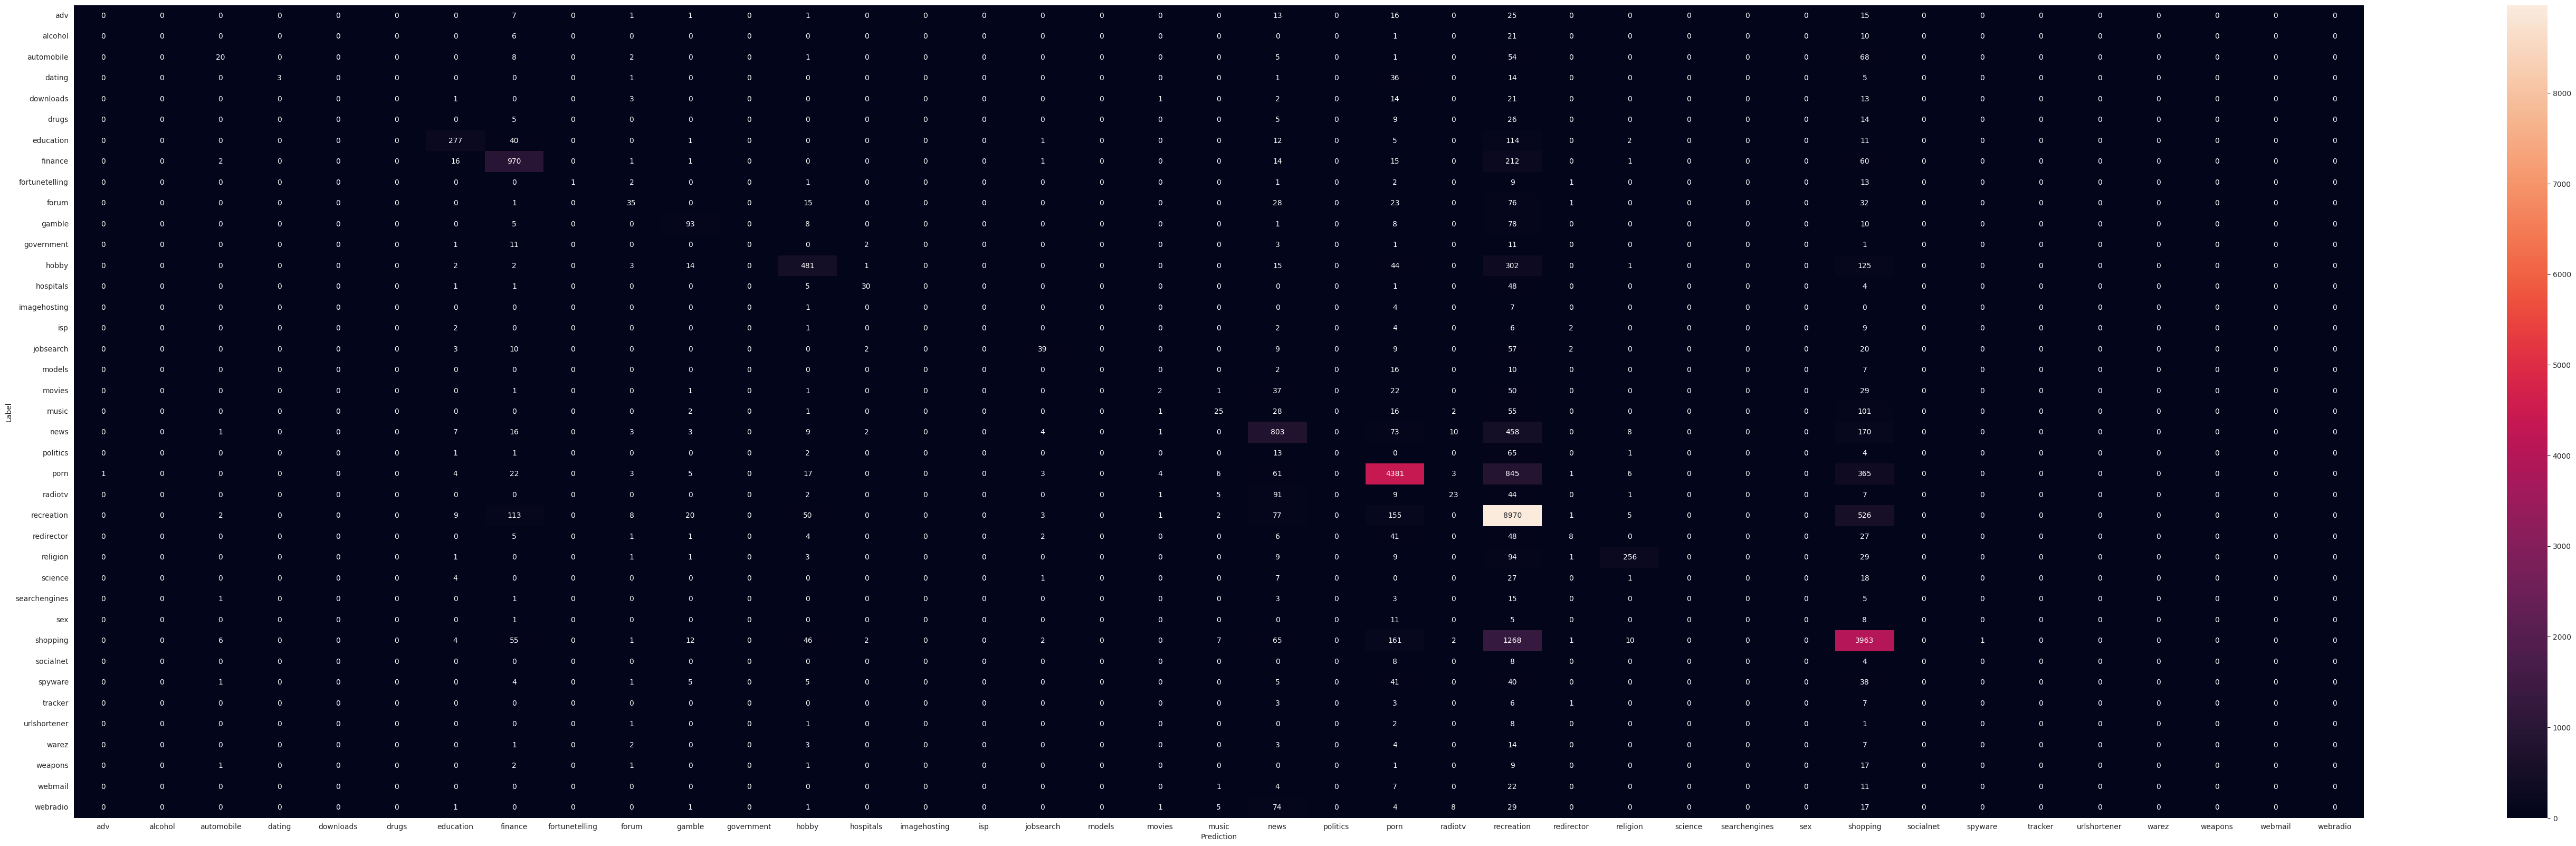

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(70, 20))
sns.set_style(style='white')

sns.heatmap(confusion_mtx,
            xticklabels=classes,
            yticklabels=classes,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Plot

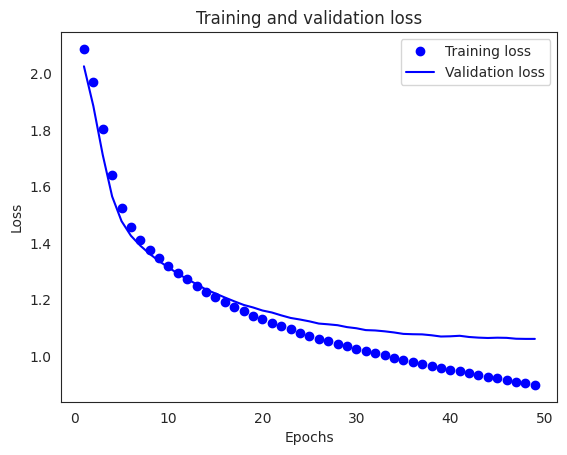

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

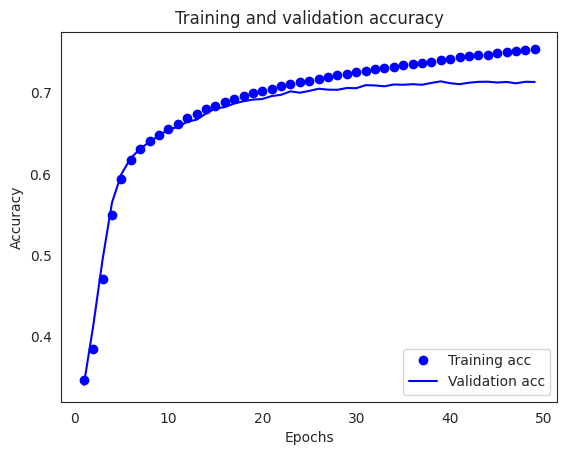

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Save Model

In [ ]:
%pwd

'/content/drive/MyDrive/Colab/pydomains'

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(test_dataset)
print(accuracy)

447/447 [==============================] - 3s 6ms/step - loss: 1.0679 - accuracy: 0.7132
0.7132108211517334


# Inference

In [ ]:
examples = [
    "yahoo.com",
    "forbes.com",
    "xvideos.com",
    "last.fm",
    "facebook.com",
    "bellesa.co",
    "marketwatch.com"
]


import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
import re
import string 

nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))
most_common_words = ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service', 'en', 'get', 'one', 'find', 'menu', 'account', 'next']
# ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service']


def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      text = soup.get_text()
      result = ' '.join(list(set([t.lower().strip() for t in text.split() if t.strip().isalpha()])))
      return result

def data_cleanup(s):
      # remove numbers
      s = re.sub(r'\d+', '', s)
      # remove duplicates
      tokens = list(set(s.split()))
      # remove punctuation from each token
      table = str.maketrans('', '', string.punctuation)
      tokens = [w.translate(table) for w in tokens]
      # remove non english words
      tokens = [w.lower() for w in tokens if w.lower() in words]
      # remove non alpha
      tokens = [w.lower() for w in tokens if w.isalpha()]
      # remove non ascii
      tokens = [w.lower() for w in tokens if w.isascii()]
      # filter out stop words
      tokens = [w for w in tokens if not w in stop_words]
      # filter out short tokens
      tokens = [word for word in tokens if len(word) > 1]
      # remove most common words
      tokens = [w for w in tokens if not w in most_common_words]
      return " ".join(w for w in tokens)

for i in range(len(examples)):
  print(f"{examples[i]}")
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  text = data_cleanup(text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


yahoo.com
forbes.com
xvideos.com
last.fm
facebook.com
bellesa.co
marketwatch.com


In [ ]:
examples

['yahoo book driving trump ambitious closer less debate hilarious prospect hit strategy little senator part keeping security military drawn title oversight place hinge take campaign recent engine board sport right righteous supposed mortgage first sign chance garage doom victory gore variable ceiling six sports post bowl could regulator erase much see cloud fox fatal war weary line alongside beat trapped hygienist rest used cheered different almost crew bunting fired city basket central balk cheap average ignore joe woman lens come chapter go media finance affordable electric keep still abusive data spend road lawsuit blue potential chatter heavily holding always throughout attempt sixth revenue posing live maple life player enlist national house bing old influence kindness become reaction early york hedging surveillance yahoo tourism defense final debt support continue hope relief say behavior beyond lots miller text canada productive poll react set week expert prompt morning tested f

In [ ]:
results = export_model.predict(examples)

1/1 [==============================] - 0s 116ms/step


In [ ]:
probs = tf.nn.softmax(results)

In [ ]:
probs[3]

<tf.Tensor: shape=(41,), dtype=float32, numpy=
array([0.02378328, 0.02371326, 0.02375789, 0.0237176 , 0.02397101,
       0.02371773, 0.02370533, 0.02368955, 0.02384323, 0.02417455,
       0.02371579, 0.02370205, 0.02373662, 0.02386031, 0.02371594,
       0.02372134, 0.02371783, 0.02376902, 0.02373887, 0.02473317,
       0.04224361, 0.02511885, 0.02376648, 0.02397578, 0.02524651,
       0.0238042 , 0.0238934 , 0.02380995, 0.02388564, 0.02372538,
       0.02370176, 0.02447832, 0.02374557, 0.02377651, 0.02370832,
       0.02371982, 0.02374631, 0.02371095, 0.02374726, 0.02595294,
       0.02375806], dtype=float32)>

In [ ]:
res_args = tf.argmax(results, 1)

In [ ]:
res_args

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([21, 21, 23, 20, 25, 23, 21])>

In [ ]:
res_args.numpy()

array([21, 21, 23, 20, 25, 23, 21])

In [ ]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic', 'education',
       'finance', 'fortunetelling', 'forum', 'gamble', 'government', 'hacking',
       'health', 'hobby', 'homestyle', 'hospitals', 'imagehosting', 'isp',
       'jobsearch', 'library', 'military', 'models', 'movies', 'music', 'news',
       'podcasts', 'politics', 'porn', 'radiotv', 'recreation', 'redirector',
       'religion', 'remotecontrol', 'ringtones', 'science', 'searchengines',
       'sex', 'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [ ]:
examples[0].split()[0]
classes[res_args.numpy()[0]]

'hospitals'

In [ ]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args.numpy()[i]]}")

yahoo : news
forbes : news
xvideos : porn
last : music
facebook : recreation
bellesa : porn
marketwatch : news


In [ ]:
from collections import Counter
  
cat_vocab = {}

def build_cat_vocab(cat, text):
  if cat not in cat_vocab:
    cat_vocab[cat] = Counter()
  cat_vocab[cat].update(text.split())
  

for index, row in df.iterrows():
  build_cat_vocab(row['cat_name'], row['text'])

In [ ]:
x = 'scoreboard celebrity politics next mon finance insider sun billboard yesterday mail sat people today weather tomorrow shopping entertainment life sports style'
for i in x.split():
  print(f"{i} - {cat_vocab['porn'][i]}")

scoreboard - 6
celebrity - 2474
politics - 215
next - 161
mon - 3407
finance - 506
insider - 182
sun - 1211
billboard - 67
yesterday - 338
mail - 1944
sat - 434
people - 5905
today - 4379
weather - 339
tomorrow - 352
shopping - 1884
entertainment - 2923
life - 4955
sports - 1721
style - 5914


# Export Model

In [ ]:
export_model.save('saved_model/piedomains_v5')

In [ ]:
!ls -ltr

total 799281
-rw------- 1 root root    651394 Apr 29  2022 train_v2.ipynb
drwx------ 2 root root      4096 Apr 29  2022 data
drwx------ 2 root root      4096 Apr 29  2022 models
-rw------- 1 root root    190456 May  3  2022 data.ipynb
-rw------- 1 root root    498169 May  3  2022 train.ipynb
-rw------- 1 root root     14021 May  3  2022 testpackage.ipynb
-rw------- 1 root root 201153616 Sep  5  2022 model_v3.h5
drwx------ 3 root root      4096 Sep  5  2022 saved_model
-rw------- 1 root root    421360 Sep  5  2022 train_v3_500k.ipynb
-rw------- 1 root root 201049168 Sep  6  2022 model_v3_260k.h5
-rw------- 1 root root     36817 Sep 16  2022 domain_names.ipynb
-rw------- 1 root root     13411 Oct 28 22:26 parser.ipynb
drwx------ 2 root root      4096 Nov 11 15:15 screenshots
-rw------- 1 root root   2640002 Dec  2 22:44 data_images.ipynb
-rw------- 1 root root   3055216 Dec  7 23:52 preprocessing_images.ipynb
-rw------- 1 root root    586681 Dec 14 20:26 train_images.ipynb
-rw------- 1 r

# Load and test model

In [ ]:
loaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  loaded_model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

In [54]:
classes = ['adv', 'alcohol', 'automobile', 'dating', 'downloads', 'drugs',
       'education', 'finance', 'fortunetelling', 'forum', 'gamble',
       'government', 'hobby', 'hospitals', 'imagehosting', 'isp', 'jobsearch',
       'models', 'movies', 'music', 'news', 'politics', 'porn', 'radiotv',
       'recreation', 'redirector', 'religion', 'science', 'searchengines',
       'sex', 'shopping', 'socialnet', 'spyware', 'tracker', 'urlshortener',
       'warez', 'weapons', 'webmail', 'webradio']
export_model2 = tf.keras.models.load_model('saved_model/piedomains_v5')

In [47]:
classes = ['adv', 'alcohol', 'automobile', 'dating', 'downloads', 'drugs',
       'education', 'finance', 'fortunetelling', 'forum', 'gamble',
       'government', 'hacking', 'hobby', 'hospitals', 'imagehosting', 'isp',
       'jobsearch', 'models', 'movies', 'music', 'news', 'politics', 'porn',
       'radiotv', 'recreation', 'redirector', 'religion', 'science',
       'searchengines', 'sex', 'shopping', 'socialnet', 'spyware', 'tracker',
       'urlshortener', 'warez', 'weapons', 'webmail', 'webradio', 'webtv']

export_model2 = tf.keras.models.load_model('saved_model/piedomains_v4')

In [39]:
examples = [
    "yahoo.com",
    "forbes.com",
    "draftkings.com",
    "pornhub.com",
    "xvideos.com",
    "google.com",
    "amazon.com",
    "facebook.com",
    "fidelity.com",
    "youtube.com",
    "youporn.com",
    "bellesa.co",
    "medium.com",
    "last.fm",
    "bellesa.co",
    "netflix.com",
    "medium.com",
    "marketwatch.com",
    "khanacademy.org"
]


import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
import re
import string 

nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))
most_common_words = ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service', 'en', 'get', 'one', 'find', 'menu', 'account', 'next']
# ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service']


def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      text = soup.get_text()
      result = ' '.join(list(set([t.lower().strip() for t in text.split() if t.strip().isalpha()])))
      return result

def data_cleanup(s):
      # remove numbers
      s = re.sub(r'\d+', '', s)
      # remove duplicates
      tokens = list(set(s.split()))
      # remove punctuation from each token
      table = str.maketrans('', '', string.punctuation)
      tokens = [w.translate(table) for w in tokens]
      # remove non english words
      tokens = [w.lower() for w in tokens if w.lower() in words]
      # remove non alpha
      tokens = [w.lower() for w in tokens if w.isalpha()]
      # remove non ascii
      tokens = [w.lower() for w in tokens if w.isascii()]
      # filter out stop words
      tokens = [w for w in tokens if not w in stop_words]
      # filter out short tokens
      tokens = [word for word in tokens if len(word) > 1]
      # remove most common words
      tokens = [w for w in tokens if not w in most_common_words]
      return " ".join(w for w in tokens)

for i in range(len(examples)):
  print(f"{examples[i]}")
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  text = data_cleanup(text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


yahoo.com
forbes.com
draftkings.com
pornhub.com
xvideos.com
google.com
amazon.com
facebook.com
fidelity.com
youtube.com
youporn.com
bellesa.co
medium.com
last.fm
bellesa.co
netflix.com
medium.com
marketwatch.com
khanacademy.org


In [40]:
examples

['yahoo mail watch may blast ordered embrace sync wear wondering right despite nest different transfer outfit rack low finance platform perfect wealth play spade train tucker sometimes north felt wedding start plan see nine draft another airport calling morning long job wearing like much million additional lightweight dating snap family employee chosen two liking dream comfortable display real judge whose loss bud biggest set later save must big sixth length college assure season lot dress daily blue love repudiate stop starting defamed way want hockey game nearly good tepid golden demand date many skin store woman user found prison cozy clarity private wonder adorable make lawyer react picnic following day supply thanks dental conservatism alternative violation insurance need russia member took price similar tell keeping syndrome nude entertainment canada yahoo rookie went view candle said cheap market chance garage standard secretly second least silence discharge since instant live w

In [68]:
examples = ['khanacademy basic needs mathematics log enable provide computer trouble seeing academy language meet change come khan teacher likely ai priceless learning loading external government child grade life library behind room sure twice need course differentiate education sign truly understanding space across emotional million project finally live learn filling nonprofit able every notice used chance ensure donate algebra earth practice tailor use math empower missing first mission physics recent make fear start ready early reading biology environmental science content high love art country volunteer calculus web support found entire please school poor identify history',
 'medium elementary different would go teens epic open diagnosis speak maybe change jeans smoke turn destiny ever medium unquenchable underscore hole min threat two sky helping medical true regulate big product cheese interview story technology improbable dog galaxy deterministic hold inspirational available er war lid initially gap proof fried like archive living chicken quest seek turning macaroni recently damn use math collard good diagnose example make delicious art quickly journalism thirst found great',
 'netflix basic easily different rating specific variety computer go feature monthly personal cancel paying streaming much always come let watch low want sell enjoy instantly restart device smart number plan create two stop whenever share library restrict call limited stream sign range included control give added space extensive take available unlimited gift location apple something lower every enter extra discover wide without experience use block cancellation due favorite good parental also start fixed way content love maturity game made web pesky great ad membership media learn',
 'youtube ',
 'yahoo record harry specific singer important would dive plus bikini cost gun entertainment bathtub seeing academy streaming much significant look award leading teacher actually smart power reheat try display investigate polished administration executive noise lawsuit limited came worked bare girl impress time confirm trainer offer commitment operating following live able bank category mentor social shampoo used say without extraordinarily awake finance sheet impression pitcher lost spent recent unilateral cultural early quarterback plex cattle run love person jeff may forward mass trade official platform several drag random days shopping woman bowman portal consider inning owner different enable date back financial cheap cloudy year transfer benefit idea probe posting las suit campaign fateful voice low daughter couple update two went gio central whenever photo pure hybrid life unsafe pickup talk shooting rumor longer attend various plea sports inside end break last coronation pentagon giving drank boxing hold take covenant hard lived league getting spring every racer spectacularly page baseball lewis tattoo inadvertently imagine got extending driving directly legal payment squared coast haystack day juice four signal epitome jordan yahoo within hissing ring dead three presidential tour state abuse coach know found mother school really super needs championship leg snaps network access body incident could curing six faith want major best freshman leadership aftermath classified dealing child numerous story thing sign barking guard reportedly risk integrate caller military pedigree working established tax alongside order county project tibia pass beef gift location beer spencer something calling predecessor analyst said series cobra behalf tracker around young experience partnership leader world affect little system latest defensive also native suffering leaker trail thanks video still pretty duo recap kissing according high rock obviously basketball mustang view elementary past expansion offering progress query speed understand kyle saint another jet meet position grandmother sophia city ava bud telling source already statement taking bald behind seeking alameda big five responsible fantasy wealth hate mail chat radio action post teammate premier gone boy employed wife sunny dame bali program family concerning tell goes cup enough like never today beloved friend simple facing company streamer ugly season dalton prince thinking recently multiple biggest killing trump handful first jake secret expanding husker make ready people laid candidate way staff turns made corner support currently evolution nail testing learn',
 ]

In [69]:
results = export_model2.predict(examples)

1/1 [==============================] - 0s 42ms/step


In [70]:
probs = tf.nn.softmax(results)

In [71]:
probs[0]

<tf.Tensor: shape=(39,), dtype=float32, numpy=
array([0.02521003, 0.02504726, 0.02505913, 0.02522642, 0.02527089,
       0.02517279, 0.02674506, 0.02512771, 0.02528128, 0.02583474,
       0.02516532, 0.02504351, 0.02606718, 0.02528196, 0.02503678,
       0.02506356, 0.02548053, 0.02508752, 0.02558806, 0.02582248,
       0.0265535 , 0.02532652, 0.02978751, 0.02529182, 0.02799805,
       0.02552732, 0.02808384, 0.02540335, 0.02504547, 0.02502721,
       0.02723972, 0.02509838, 0.02534385, 0.02503001, 0.0250671 ,
       0.02514577, 0.02501427, 0.02512488, 0.0252793 ], dtype=float32)>

In [72]:
res_args = tf.argmax(results, 1)

In [73]:
res_args

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([22, 22, 24, 24, 22])>

In [74]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args.numpy()[i]]}")

khanacademy : porn
medium : porn
netflix : recreation
youtube : recreation
yahoo : porn


In [ ]:
labels = []
domain_probs = []

for i in range(len(examples)):
    labels.append(classes[res_args.numpy()[i]])
    domain_probs.append(np.around(probs[i][res_args[i]]))

In [ ]:
labels

['porn',
 'news',
 'gamble',
 'porn',
 'porn',
 'recreation',
 'porn',
 'porn',
 'finance',
 'porn',
 'porn',
 'porn',
 'recreation',
 'music',
 'porn',
 'finance',
 'porn']

In [ ]:
domain_probs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
export_model.save('/content/drive/MyDrive/Colab/pydomains/data/saved_model/piedomains_v4')

In [ ]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'costtraps',
       'dating', 'downloads', 'drugs', 'dynamic', 'education', 'finance',
       'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby',
       'homestyle', 'hospitals', 'imagehosting', 'isp', 'jobsearch', 'library',
       'military', 'models', 'movies', 'music', 'news', 'podcasts', 'politics',
       'porn', 'radiotv', 'recreation', 'redirector', 'religion',
       'remotecontrol', 'ringtones', 'science', 'searchengines', 'sex',
       'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [ ]:
!cp -R saved_model /tmp

In [ ]:
!ls -ltr /tmp

total 44
lrwxrwxrwx 1 root root   66 Oct 28 17:42 kernel_manager_proxy.INFO -> kernel_manager_proxy.aebfb3b51e04.root.log.INFO.20221028-174212.12
-rw-r--r-- 1 root root 1700 Oct 28 17:42 kernel_manager_proxy.aebfb3b51e04.root.log.INFO.20221028-174212.12
srwxr-xr-x 1 root root    0 Oct 28 17:42 debugger_15rtdf9bgy
lrwxrwxrwx 1 root root   61 Oct 28 17:42 dap_multiplexer.INFO -> dap_multiplexer.aebfb3b51e04.root.log.INFO.20221028-174215.69
-rw-r--r-- 1 root root 1184 Oct 28 17:42 dap_multiplexer.aebfb3b51e04.root.log.INFO.20221028-174215.69
srw------- 1 root root    0 Oct 28 17:53 drivefs_ipc.0
srw------- 1 root root    0 Oct 28 17:53 drivefs_ipc.0_shell
drwx------ 2 root root 4096 Oct 28 17:53 initgoogle_syslog_dir.0
lrwxrwxrwx 1 root root   73 Oct 28 17:53 directoryprefetcher_binary.INFO -> directoryprefetcher_binary.aebfb3b51e04.root.log.INFO.20221028-175319.313
drwxr-xr-x 3 root root 4096 Oct 28 17:53 python-languageserver-cancellation
-rw-r--r-- 1 root root 1658 Oct 28 17:53 directo

In [ ]:
%cd /tmp/saved_model

/tmp/saved_model


In [ ]:
%pwd

'/tmp/saved_model'

In [ ]:
%ls

piedomains_260k_v3/  piedomains_v3/


In [ ]:
!mv piedomains_260k_v3 piedomains

In [ ]:
!rm -rf piedomains_v3

In [ ]:
%ls

piedomains/


In [ ]:
%cd /tmp

/tmp


In [ ]:
!tar cfz shallalist_v3_model.tar.gz saved_model

In [ ]:
!cp shallalist_v3_model.tar.gz /content/drive/MyDrive/Colab/pydomains/models/

## Store for Calibration

In [ ]:
df.head()

,text,domain,cat_name,category_codes
0,try function true atmosphere rah deluxe return...,business-tour,recreation,24
1,wonderful lot picture following kept ended tak...,blownalky.netfirms,recreation,24
4,cape price bedroom climate plan sea kilometer ...,capeescapes,recreation,24
5,swaying bedroom dock waterfront perfect island...,sanibelsand,recreation,24
7,das bis digital den stark nach sailing charter...,ibn-online,recreation,24


In [ ]:
df['domain_text'] = df['domain'] + ' ' + df['text']

In [ ]:
df.head()

,text,domain,cat_name,category_codes,domain_text
0,try function true atmosphere rah deluxe return...,business-tour,recreation,24,business-tour try function true atmosphere rah...
1,wonderful lot picture following kept ended tak...,blownalky.netfirms,recreation,24,blownalky.netfirms wonderful lot picture follo...
4,cape price bedroom climate plan sea kilometer ...,capeescapes,recreation,24,capeescapes cape price bedroom climate plan se...
5,swaying bedroom dock waterfront perfect island...,sanibelsand,recreation,24,sanibelsand swaying bedroom dock waterfront pe...
7,das bis digital den stark nach sailing charter...,ibn-online,recreation,24,ibn-online das bis digital den stark nach sail...


In [ ]:
X = (df['domain'] + ' ' + df['text']).values
y = df['category_codes'].values

In [ ]:
X.shape

(285744,)

In [ ]:
results = export_model2.predict(X)

8930/8930 [==============================] - 28s 3ms/step


In [ ]:
results.shape

(285744, 39)

In [ ]:
probs = tf.nn.softmax(results)

In [ ]:
probs.shape

TensorShape([285744, 39])

In [ ]:
sum(probs[0])

<tf.Tensor: shape=(), dtype=float32, numpy=1.0000001>

In [ ]:
pred_labels = tf.argmax(results, 1)

In [ ]:
act_labels = y

In [ ]:
act_labels.shape

(285744,)

In [ ]:
pred_labels.shape

TensorShape([285744])

In [ ]:
actual = [classes[i] for i in act_labels]

In [ ]:
pred_labels.numpy()

array([24, 24, 24, ..., 24, 20, 24])

In [ ]:
predicted = [classes[i] for i in pred_labels.numpy()]

In [ ]:
site = [X[i].split()[0] for i in range(len(X))]

In [ ]:
site[:10]

['business-tour',
 'blownalky.netfirms',
 'capeescapes',
 'sanibelsand',
 'ibn-online',
 'dukemansion',
 'asvolt',
 'prazereluxuria.blogs.sapo',
 'comingoutmovie',
 'kampkritter']

In [ ]:
max_probs = [max(i) for i in probs.numpy()]

In [ ]:
min_probs = [min(i) for i in probs.numpy()]

In [ ]:
probs_df = pd.DataFrame(probs.numpy(), columns=classes)

In [ ]:
probs_df.head()

cat_name,adv,alcohol,automobile,dating,downloads,drugs,education,finance,fortunetelling,forum,...,sex,shopping,socialnet,spyware,tracker,urlshortener,warez,weapons,webmail,webradio
0,0.025021,0.024994,0.025147,0.024965,0.025002,0.025009,0.025139,0.025562,0.024965,0.025138,...,0.024947,0.031189,0.024955,0.025084,0.024940,0.024951,0.024971,0.024959,0.024992,0.025019
1,0.024733,0.024756,0.025046,0.024731,0.024734,0.024745,0.024731,0.024732,0.024734,0.024745,...,0.024733,0.029037,0.024732,0.024736,0.024732,0.024732,0.024732,0.024775,0.024737,0.024732
2,0.024581,0.024583,0.024594,0.024581,0.024581,0.024582,0.024590,0.024641,0.024580,0.024583,...,0.024580,0.024731,0.024581,0.024583,0.024580,0.024581,0.024581,0.024581,0.024582,0.024581
3,0.024733,0.024736,0.024784,0.024724,0.024724,0.024731,0.024771,0.025130,0.024720,0.024744,...,0.024720,0.026154,0.024721,0.024749,0.024719,0.024721,0.024723,0.024723,0.024730,0.024730
4,0.024617,0.024627,0.024691,0.024614,0.024615,0.024618,0.024631,0.024671,0.024615,0.024629,...,0.024613,0.025121,0.024614,0.024618,0.024614,0.024615,0.024615,0.024620,0.024618,0.024618


In [ ]:
labels_df = pd.DataFrame({'site': site, 'actual': actual, 'predicted': predicted,'actual_labels':act_labels,'pred_labels': pred_labels, 'predicted_prob': max_probs})

In [ ]:
labels_df.head()

,site,actual,predicted,actual_labels,pred_labels,predicted_prob
0,business-tour,recreation,recreation,24,24,0.037016
1,blownalky.netfirms,recreation,recreation,24,24,0.054843
2,capeescapes,recreation,recreation,24,24,0.065453
3,sanibelsand,recreation,recreation,24,24,0.056469
4,ibn-online,recreation,recreation,24,24,0.063401


In [ ]:
labels_df.shape

(285744, 6)

In [ ]:
probs_df.shape

(285744, 39)

In [ ]:
final_df = labels_df.join(probs_df)

In [ ]:
final_df.shape

(285744, 45)

In [ ]:
final_df.to_csv('final_calibrate_v5.csv')

In [ ]:
%pwd

'/content/drive/MyDrive/Colab/pydomains'